In [1]:
import pandas as pd
A=pd.read_csv("Cars93.csv")
B=pd.read_csv("iris.csv")

In [2]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


#  Decision Tree For Regression

In [3]:
cat=[]
con=[]
for i in A.columns:
    if (A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

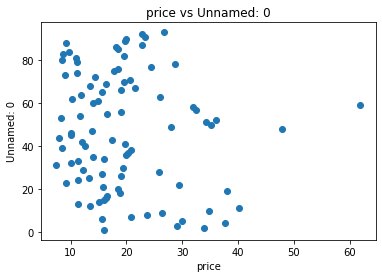

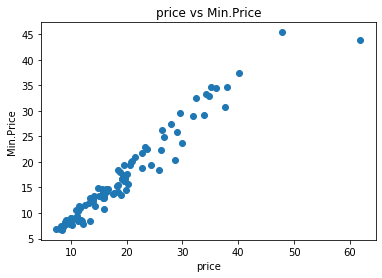

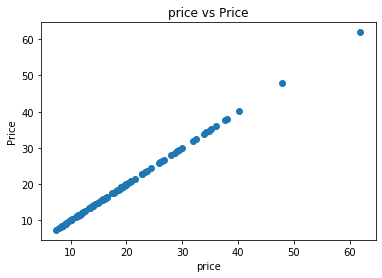

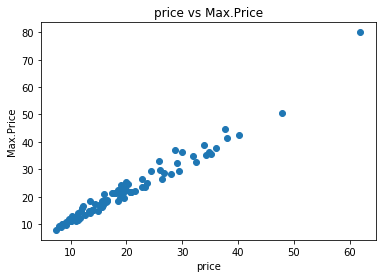

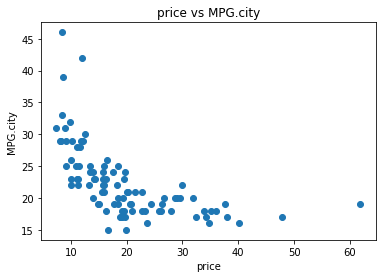

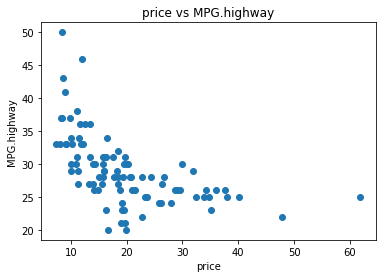

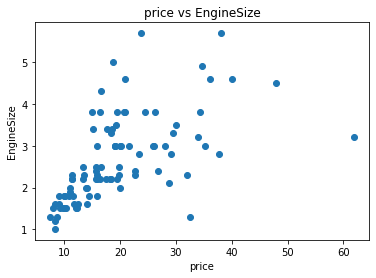

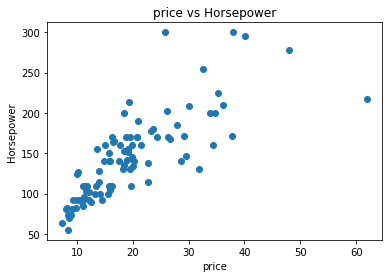

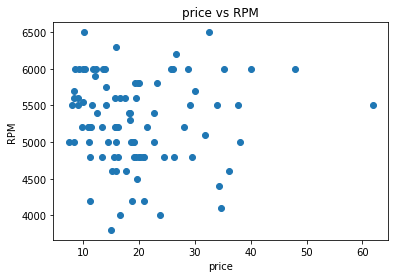

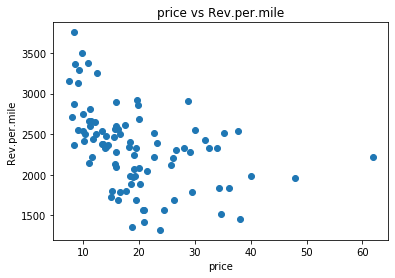

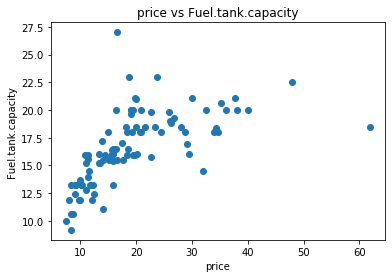

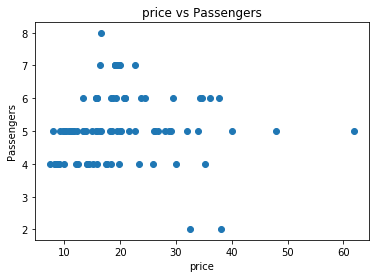

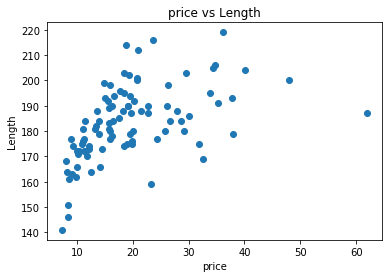

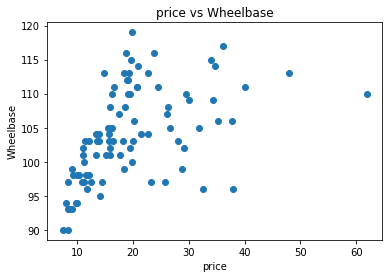

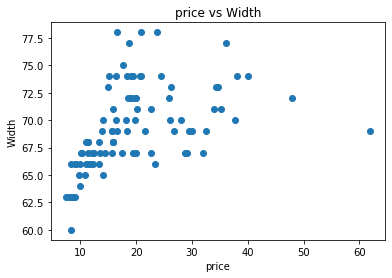

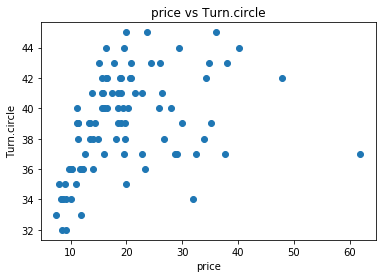

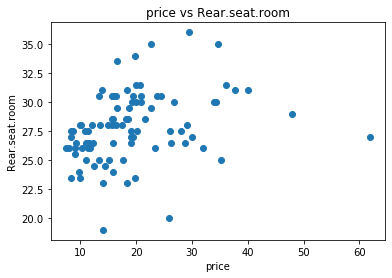

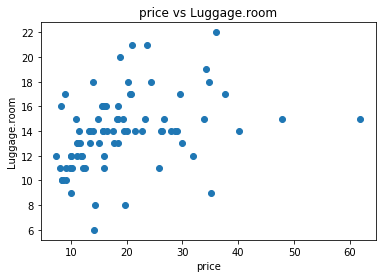

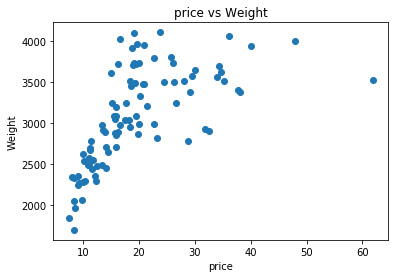

In [5]:
import matplotlib.pyplot as plt
%matplotli
import seaborn as sb
for i in con:
    plt.scatter(A.Price,A[i])
    plt.xlabel("price")
    plt.ylabel("%s"%i)
    plt.title("price vs %s"%i)
    plt.show()

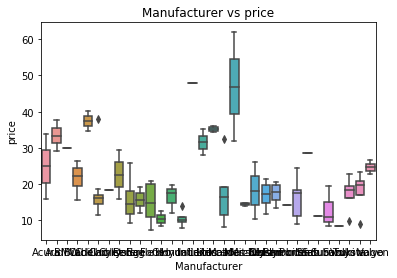

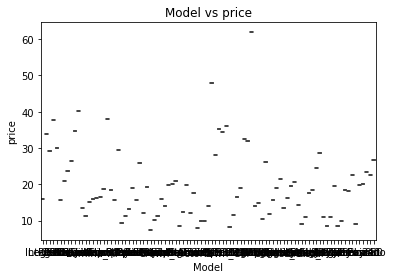

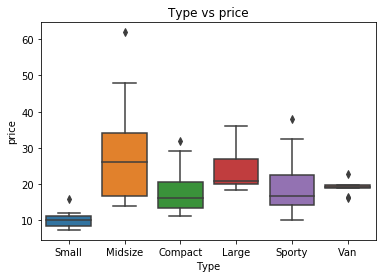

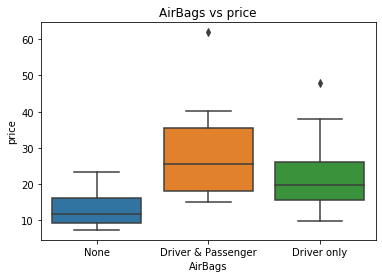

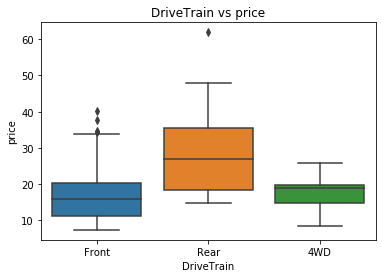

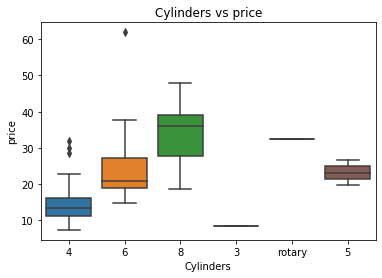

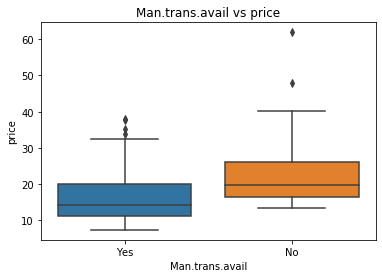

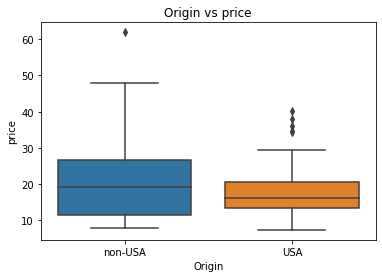

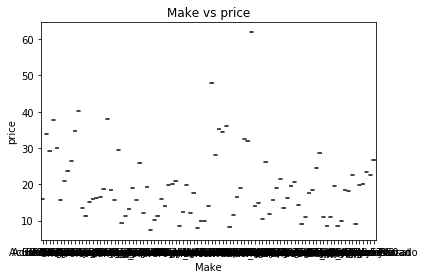

In [6]:
for i in cat:
    sb.boxplot(A[i],A.Price)
    plt.ylabel("price")
    plt.xlabel("%s"%i)
    plt.title("%s vs price"%i)
    plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A.apply(le.fit_transform)


In [8]:
B

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,0,0,48,3,25,33,36,10,11,2,...,2,18,10,6,5,9,4,24,1,0
1,1,0,55,2,67,71,73,3,5,0,...,2,36,23,9,6,16,8,60,1,1
2,2,1,8,0,63,66,63,5,6,1,...,2,21,10,5,5,12,7,50,1,3
3,3,1,0,2,69,76,76,4,6,0,...,3,34,14,8,5,18,10,52,1,2
4,4,2,5,2,61,68,69,7,10,1,...,1,27,17,7,7,10,6,64,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,30,41,5,42,47,49,2,1,2,...,4,28,23,10,6,21,23,75,1,88
89,89,30,64,0,46,50,47,6,10,2,...,2,21,11,5,3,19,7,39,1,90
90,90,30,28,4,60,57,51,3,5,2,...,1,3,5,4,4,8,8,28,1,87
91,91,31,2,0,57,56,50,6,8,1,...,2,31,12,5,5,15,7,39,1,91


In [9]:
X=B[B.columns[~B.columns.isin(['Price'])]]
Y=B[["Price"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=30,max_leaf_nodes=36)
model=dtr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(ytest,pred)
print(MAE)

4.065476190476191


In [11]:
for i in range(2,20):
    from sklearn.tree import DecisionTreeRegressor
    dtr =DecisionTreeRegressor(max_leaf_nodes=i,random_state=30)
    model=dtr.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    MAE=mean_absolute_error(ytest,pred)
    print("leaf:%d Error:%f"%(i,MAE))

leaf:2 Error:10.750812
leaf:3 Error:8.702731
leaf:4 Error:6.817212
leaf:5 Error:6.779659
leaf:6 Error:6.160683
leaf:7 Error:5.336278
leaf:8 Error:4.788594
leaf:9 Error:4.714784
leaf:10 Error:4.511862
leaf:11 Error:4.308631
leaf:12 Error:4.355060
leaf:13 Error:4.265774
leaf:14 Error:4.109524
leaf:15 Error:4.026190
leaf:16 Error:4.017262
leaf:17 Error:4.058333
leaf:18 Error:3.940476
leaf:19 Error:3.809524


In [12]:
from sklearn.model_selection import GridSearchCV
tp={"max_leaf_nodes":range(2,100,1),"random_state":range(10,100,10)}
dtr=DecisionTreeRegressor(random_state=30)
cv=GridSearchCV(dtr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
cvmodel.best_params_

{'max_leaf_nodes': 9, 'random_state': 30}

# decision tree  classifier

In [14]:
import pandas as pd
A=pd.read_csv("iris.csv")

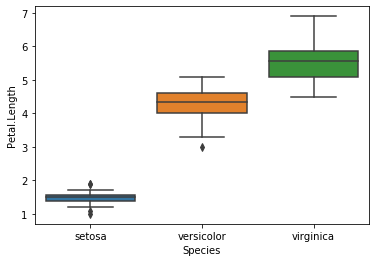

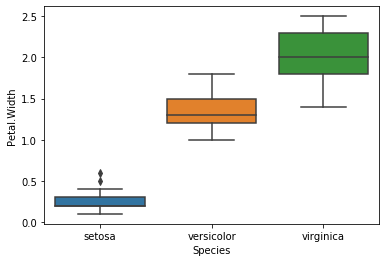

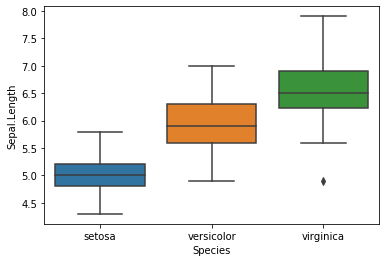

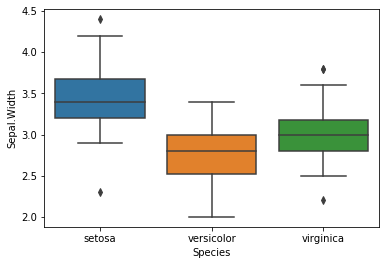

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot(A.Species,A["Petal.Length"])
plt.show()
sb.boxplot(A.Species,A["Petal.Width"])
plt.show()
sb.boxplot(A.Species,A["Sepal.Length"])
plt.show()
sb.boxplot(A.Species,A["Sepal.Width"])
plt.show()

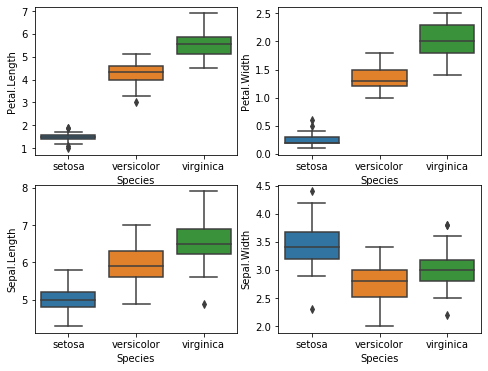

In [16]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sb.boxplot(A.Species,A["Petal.Length"])
plt.subplot(2,2,2)
sb.boxplot(A.Species,A["Petal.Width"])
plt.subplot(2,2,3)
sb.boxplot(A.Species,A["Sepal.Length"])
plt.subplot(2,2,4)
sb.boxplot(A.Species,A["Sepal.Width"])
plt.show()

In [17]:
X=A[["Petal.Length","Petal.Width","Sepal.Length","Sepal.Width"]]
Y=A[["Species"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=34)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
tp={"criterion":["gini","entropy"],"max_leaf_nodes":range(2,30,1)}
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
pred=cvmodel.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9

In [19]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model=nb.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667